# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city_name = []
country = []
date = []
latitude = []
longitude = []
cloudiness = []
wind_speed = []
humidity = []
max_temp = []
record = 0
Set = 1 
current_city = ""
for city in cities:
    try:
    
        query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
        response = requests.get(query_url).json()
        current_city = city
        time.sleep(1.01)
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])        
        longitude.append(response["coord"]["lon"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])               
        humidity.append(response["main"]["humidity"])       
        max_temp.append(response["main"]["temp_max"])
        record += 1
        if record == 50:
            Set += 1
            record = 1 
        print(f"Processing Record {record} of Set {Set} | {current_city}")
    except:
        print("City not found....Skip")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | sindor
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | owando
Processing Record 5 of Set 1 | aklavik
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | kirakira
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | sao joao da barra
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | belmonte
Processing Record 13 of Set 1 | ambur
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | astoria
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | matagami
Processing Record 18 of Set 1 | shymkent
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | fort saint james
City not found....Skip
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | hobyo
Processing Record 23 of Set 1 | tiksi
Processing Record 24 of Set 1 | strezhev

Processing Record 41 of Set 4 | misratah
City not found....Skip
Processing Record 42 of Set 4 | kruisfontein
City not found....Skip
Processing Record 43 of Set 4 | newport
Processing Record 44 of Set 4 | geraldton
Processing Record 45 of Set 4 | kamenka
Processing Record 46 of Set 4 | san cristobal
Processing Record 47 of Set 4 | leningradskiy
Processing Record 48 of Set 4 | kiama
City not found....Skip
Processing Record 49 of Set 4 | hamilton
Processing Record 1 of Set 5 | semey
Processing Record 2 of Set 5 | cockburn town
Processing Record 3 of Set 5 | dingle
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | lensk
Processing Record 6 of Set 5 | nacozari
Processing Record 7 of Set 5 | kavaratti
Processing Record 8 of Set 5 | banepa
Processing Record 9 of Set 5 | ponta do sol
Processing Record 10 of Set 5 | maragogi
Processing Record 11 of Set 5 | paragominas
Processing Record 12 of Set 5 | dubai
Processing Record 13 of Set 5 | darhan
Processing Record 14 of Set 5 | 

Processing Record 32 of Set 8 | ekhabi
Processing Record 33 of Set 8 | ipixuna
Processing Record 34 of Set 8 | eydhafushi
Processing Record 35 of Set 8 | razdolinsk
Processing Record 36 of Set 8 | poum
Processing Record 37 of Set 8 | faxinal
Processing Record 38 of Set 8 | ilulissat
Processing Record 39 of Set 8 | nara
Processing Record 40 of Set 8 | sa kaeo
Processing Record 41 of Set 8 | ronneby
Processing Record 42 of Set 8 | praxedis guerrero
Processing Record 43 of Set 8 | xinxiang
City not found....Skip
Processing Record 44 of Set 8 | balsas
Processing Record 45 of Set 8 | cortez
Processing Record 46 of Set 8 | berlevag
Processing Record 47 of Set 8 | dapaong
Processing Record 48 of Set 8 | saltabarranca
Processing Record 49 of Set 8 | tamasane
Processing Record 1 of Set 9 | progreso
Processing Record 2 of Set 9 | bystrice
City not found....Skip
Processing Record 3 of Set 9 | sawakin
City not found....Skip
Processing Record 4 of Set 9 | necochea
City not found....Skip
Processing 

Processing Record 19 of Set 12 | champerico
Processing Record 20 of Set 12 | zafra
Processing Record 21 of Set 12 | kununurra


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_df = pd.DataFrame ({
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":latitude, 
    "Lng":longitude, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
})
weather_df.to_csv("../output_data/weather_df.csv")
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1578433319,81,-54.81,-68.31,51.80,9.17
1,Sindor,100,RU,1578433469,95,62.87,51.90,16.03,6.15
2,New Norfolk,40,AU,1578433206,77,-42.78,147.06,68.00,4.70
3,Owando,60,CG,1578433472,50,-0.49,15.91,81.45,2.53
4,Aklavik,5,CA,1578433002,65,68.22,-135.01,-31.00,5.84


In [9]:
weather_df.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

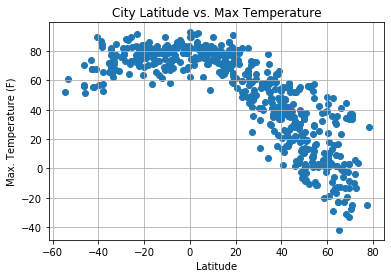

In [26]:

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show

plt.savefig("../output_data/max_lat.png")

#### Latitude vs. Humidity Plot

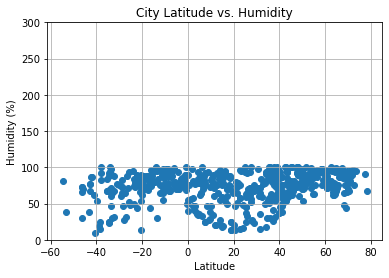

In [22]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim((0,300))
plt.grid(True)
plt.show
plt.savefig("../output_data/city_hum.png")

#### Latitude vs. Cloudiness Plot

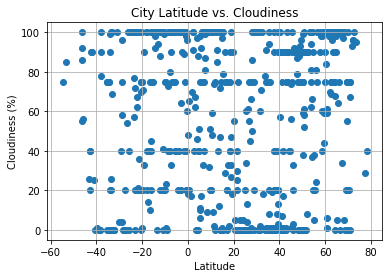

In [20]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.show
plt.savefig("../output_data/lat_cloud.png")

#### Latitude vs. Wind Speed Plot

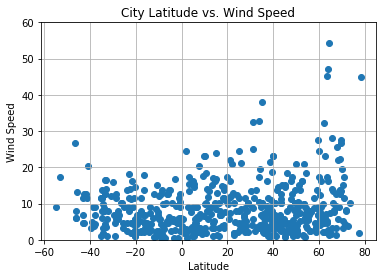

In [27]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.ylim((0,60))
plt.grid(True)
plt.show
plt.savefig("../output_data/lat_ws.png")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression